# **MOVIE RATING PREDICTION WTIH PYTHON**

Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering,and machine learning modeling techniques. It provides insights into the factors that influence movie
ratings and allows you to build a model that can estimate the ratings of movies accurately.

**Dataset**

Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform.
Clean this data by removing missing values or adding average values this process will help to manipulate the
data to help with your EDA.

**Objectives**

Build a model that predicts the rating of a movie based on features like genre, director, and actors.

Use regression techniques to tackle this problem.

The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
data = pd.read_csv('/content/Movie dataset.csv',encoding='latin1')

In [3]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.shape

(15509, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
data.describe(include='object')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [7]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### **Data Cleaning**

In [8]:
#remove rows with mising values in the column year
data = data.dropna(subset=['Year'])

In [ ]:
data.loc[:, 'Duration'] = data['Duration'].str.replace(' min', '')

In [10]:
data.loc[:, 'Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# Fill missing values in 'Duration' column with the mean
data['Duration'].fillna(data['Duration'].mean(), inplace=True)

# Convert 'Duration' column to integer type
data['Duration'] = data['Duration'].astype(int)

In [11]:
# Convert 'Duration' and 'Votes' columns to numeric, forcing errors to NaN
data.loc[:, 'Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

In [12]:
# Fill missing numerical values with the mean
data.loc[:, 'Duration'].fillna(data['Duration'].mean(), inplace=True)
data.loc[:, 'Votes'].fillna(data['Votes'].mean(), inplace=True)

In [13]:
# Fill missing categorical values with the mode
data.loc[:, 'Genre'].fillna(data['Genre'].mode()[0], inplace=True)
data.loc[:, 'Director'].fillna(data['Director'].mode()[0], inplace=True)
data.loc[:, 'Actor 1'].fillna(data['Actor 1'].mode()[0], inplace=True)
data.loc[:, 'Actor 2'].fillna(data['Actor 2'].mode()[0], inplace=True)
data.loc[:, 'Actor 3'].fillna(data['Actor 3'].mode()[0], inplace=True)

In [14]:
# Clean 'Year' column
data['Year'] = data['Year'].str.extract(r'(\d{4})').astype(int)

In [15]:
# Drop rows with missing target 'Rating' values
data = data.dropna(subset=['Rating'])

In [16]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

### **Feature Engineering**

In [17]:
# Convert categorical columns to dummy variables
data = pd.get_dummies(data, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

### **Exploratory Data Analysis (EDA)**

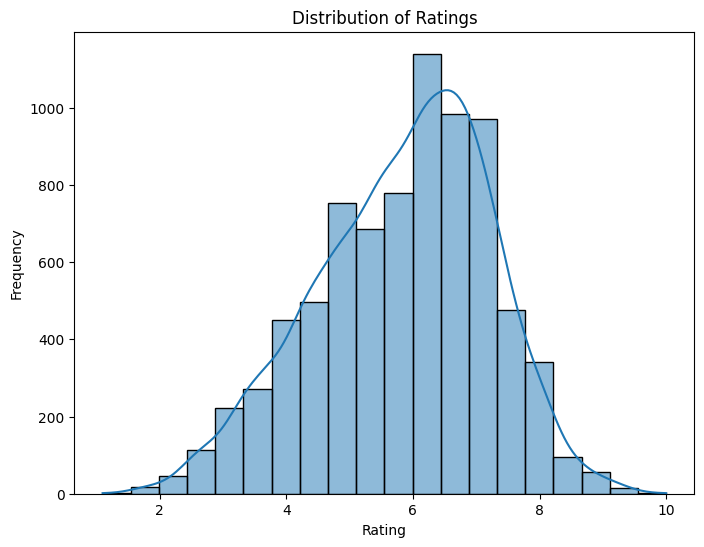

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

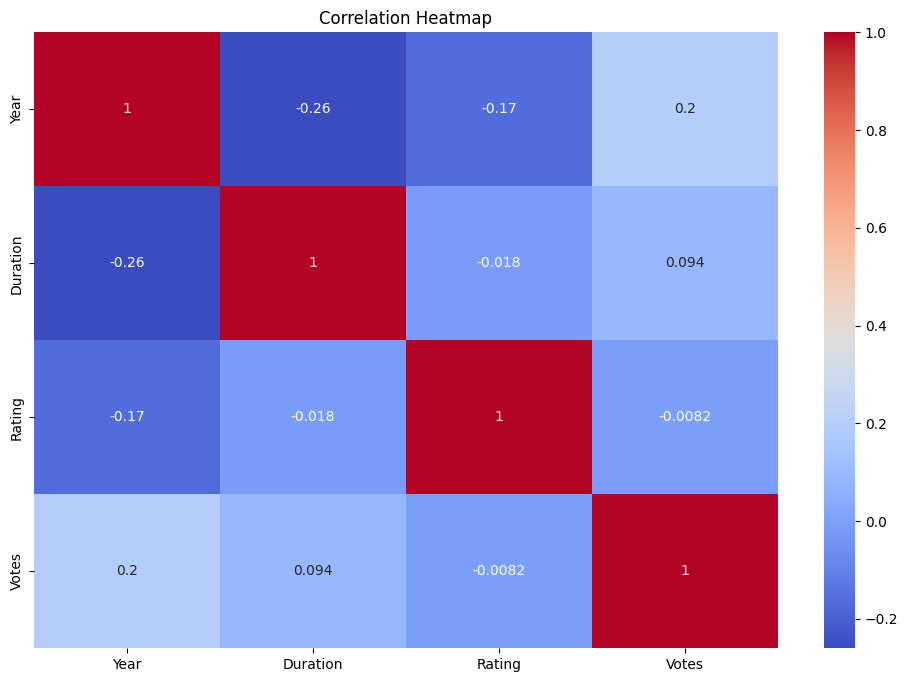

In [19]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Visualize correlation matrix for numeric columns only
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### **Model Building**

In [20]:
# Separate features and target
X = data.drop(['Name', 'Rating'], axis=1)
y = data['Rating']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5.654693252182942e+16
